# Project: Investigate a Dataset (No-shows: Is there a story behind the No-shows?)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Research questions to ask include:
<ol>
<li> Are neighborhoods with high no-show rates linked to certain characteristics of handicap cases?
<li> Are neighbordhoods generally similar in terms of no-show rates?
<li> Are neighbordhoods with high incidences of diseases linked to lower or higher no-shows?
</ol>

In [237]:
# imports and load data
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [238]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### The df.info() command indicated no null values across the columns, therefore the step of the data cleaning process were averages are used to replace missing values was not required.

### Next step to convert the columns with "object" data into string, time datatypes.
1. Gender
2. ScheduledDay
3. AppointmentDay
4. Neighbourhood
5. No-show


### Data Cleaning (Replace this with more specific notes!)

In [240]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Changed the columns with timestamps from object to datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 


In [241]:
# Changed the columns holding gender and neighbourhood as string datatypes

df['Gender'] = df['Gender'].astype(str)
df['Neighbourhood'] = df['Neighbourhood'].astype(str)

In [242]:
# Checked the datatype for all the columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [243]:
# checking for unique values of columns that should have only 2 values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [244]:
df['ScheduledDay'].head(5)

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [245]:
# checking the unique values of the column "handcap" shows that the values 
# range from 0 to 4

df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [246]:
#checked to see if any of the rows were duplicates and none are so df 
# can be retained as it is

df.duplicated().sum()

0

In [247]:
# checking the number of missing values for the columns
# it shows none of the values are missing
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [248]:
# getting the list of the columns names
# alternative is df.columns but that provides it just as a list in a df
list(df)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [249]:
# some column headers are mislabeled, so need to rename the columns 

df = df.rename(index=str, columns = {"Neighbourhood":"neighborhood", "Hipertension": "hypertension", "Handcap": "handicap"})


In [250]:
# checking renaming the columns worked
list(df)


['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'neighborhood',
 'Scholarship',
 'hypertension',
 'Diabetes',
 'Alcoholism',
 'handicap',
 'SMS_received',
 'No-show']

In [251]:
# renaming remainig columns to lower case
df.columns = map(str.lower, df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighborhood      110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [252]:
#saving dataframe to new csv file

df.to_csv('no_shows.csv', index = True)
df.head()

#then confirming the datatypes and column headers retained earlier data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighborhood      110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [253]:
df['neighborhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [254]:
# saving it to new csv file
df.to_csv('no_shows.csv', index = True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [255]:
df_noshow = pd.read_csv('no_shows.csv', encoding = "ISO-8859-1")

In [256]:
df_noshow.head(25)

,Unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29 00:00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29 00:00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29 00:00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29 00:00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29 00:00:00,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Are neighborhoods with high no-show rates linked to certain characteristics of handicap cases?

In [257]:
#checking for range in handicap
nbh_handicap = df_noshow.sort_values('handicap', ascending=False)
nbh_handicap.head(25)

,Unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
104268,104268,7.581895e+14,5697136,F,2016-05-13 15:01:17,2016-06-02 00:00:00,9,ITARARÉ,0,0,0,0,4,1,Yes
98538,98538,4.972463e+14,5760621,M,2016-06-01 15:11:25,2016-06-03 00:00:00,19,SÃO PEDRO,0,0,0,0,4,0,No
91820,91820,9.251878e+12,5789549,M,2016-06-08 15:14:00,2016-06-08 00:00:00,15,DA PENHA,0,0,0,0,4,0,No
78644,78644,3.616644e+13,5608507,M,2016-04-20 13:56:51,2016-05-05 00:00:00,7,BONFIM,0,0,0,0,3,1,No
71457,71457,5.229634e+14,5652195,F,2016-05-03 09:48:10,2016-05-06 00:00:00,64,SANTA LUÍZA,0,0,0,0,3,1,No
69683,69683,5.229634e+14,5684755,F,2016-05-11 09:05:23,2016-05-11 00:00:00,64,SANTA LUÍZA,0,0,0,0,3,0,No
104931,104931,3.995198e+12,5734979,M,2016-05-24 16:35:44,2016-06-01 00:00:00,70,ANDORINHAS,0,0,0,1,3,0,No
104932,104932,3.995198e+12,5734980,M,2016-05-24 16:35:44,2016-06-01 00:00:00,70,ANDORINHAS,0,0,0,1,3,0,No
69781,69781,5.229634e+14,5651451,F,2016-05-03 08:50:52,2016-05-03 00:00:00,64,SANTA LUÍZA,0,0,0,0,3,0,No
28840,28840,6.656653e+13,5586010,M,2016-04-15 07:12:28,2016-05-03 00:00:00,15,ROMÃO,0,0,0,0,3,1,Yes


In [258]:
# created a df of only rows where handicap was not 0

nbh_handicaponly = nbh_handicap.loc[nbh_handicap['handicap'] != 0]

In [259]:
nbh_handicaponly.shape
# checked rows were far less of 2240 vs. 110527 for full dataset.


(2241, 15)

### First interim result is that neighborhoods with handicap were in a minority of roughly 2%.

In [260]:
df = 2240/110527
print(df)

0.02026654120712586


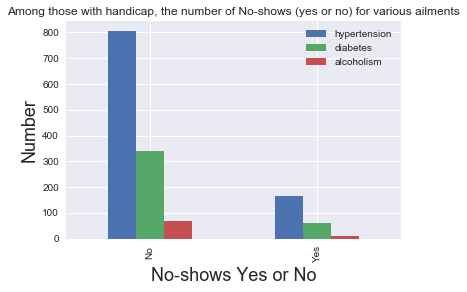

In [418]:
# creating sum of columns to see which char
# hand_grouped = nbh_handicaponly.groupby('no-show')
nbh_handicaponly.groupby('no-show')['hypertension','diabetes','alcoholism'].sum().plot(kind = 'bar', title = 'Among those with handicap, the number of No-shows (yes or no) for various ailments');
plt.xlabel('No-shows Yes or No', fontsize = 18)
plt.ylabel('Number', fontsize = 18)



### The above graph shows that the distribution of no-shows among those with at least 1 handicap indicated a similar distribution regardless of whether they were a no-show or not in terms of ailment. Regardless of no-show status, hypertension was rampant among those with a handicap, followed by patients with diabetes and then those with alcoholism.

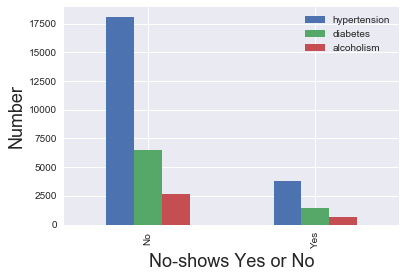

In [417]:

df_noshow.groupby('no-show')['hypertension','diabetes','alcoholism'].sum().plot(kind = 'bar')
plt.xlabel('No-shows Yes or No', fontsize = 18)
plt.ylabel('Number', fontsize = 18)


### This graph indicates that the distribution of hypertension, diabetes and alcoholism is same for both cases - no-shows vs. present for appointments. 

### As part of further investigation, I will focus on the no-shows only.


## RQ2: Are neighborhoods generally similar in terms of no-show rates?

### For this question, I will first create a no-show == yes and then no-show == no df. This will allow me to group and aggregate the columns in the df based on the columns. E.g., I need to create a df to get proportion of no-shows, gender ratios, and these will require Counts, Division while the diseases aggregation will require Sum.

In [416]:
# creating a df with only no-shows

df_noshow_yes = df_noshow.loc[(df_noshow['no-show'] == 'Yes')]
df_noshow_yes.head()


,Unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
6,6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29 00:00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29 00:00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29 00:00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29 00:00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29 00:00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [264]:
# creating a count of yes noshows per neighborhood
df_noshow_yes_count = df_noshow_yes['patientid'].groupby(df_noshow['neighborhood']).count()


In [265]:
# confirming shape and head
df_noshow_yes_count.shape

#df_noshow_yes_count.head()

(80,)

In [266]:
# creating df from series of yes count

df_noshow_yes_countnghd = pd.DataFrame(df_noshow_yes_count).reset_index()
df_noshow_yes_countnghd.columns = ['neighborhood','yes_noshow']

In [267]:
# checking neighborhood col shape
df_noshow_yes_countnghd

,neighborhood,yes_noshow
0,AEROPORTO,1
1,ANDORINHAS,521
2,ANTÔNIO HONÓRIO,50
3,ARIOVALDO FAVALESSA,62
4,BARRO VERMELHO,91
5,BELA VISTA,384
6,BENTO FERREIRA,193
7,BOA VISTA,58
8,BONFIM,550
9,CARATOÍRA,591


In [268]:
# create count of patients per neighborhood 
df_noshow_totalng = df_noshow['patientid'].groupby(df_noshow['neighborhood']).count()


In [269]:
#checking nieghborhood col shape 
df_noshow_totalng.shape
#df_noshow_totalng.head()


(81,)

In [270]:
# converting the count series to df 
df_noshow_totalnghd = pd.DataFrame(df_noshow_totalng).reset_index()
df_noshow_totalnghd.columns = ['neighborhood', 'total_count']



In [271]:
df_noshow_totalnghd

,neighborhood,total_count
0,AEROPORTO,8
1,ANDORINHAS,2262
2,ANTÔNIO HONÓRIO,271
3,ARIOVALDO FAVALESSA,282
4,BARRO VERMELHO,423
5,BELA VISTA,1907
6,BENTO FERREIRA,858
7,BOA VISTA,312
8,BONFIM,2773
9,CARATOÍRA,2565


In [272]:
#merging the 2 df on neighborhood
df_comp_neigh = pd.merge(df_noshow_totalnghd ,df_noshow_yes_countnghd, on = 'neighborhood', how = 'outer')


In [273]:
df_comp_neigh.shape

(81, 3)

In [274]:
df_comp_neigh.head()

,neighborhood,total_count,yes_noshow
0,AEROPORTO,8,1.0
1,ANDORINHAS,2262,521.0
2,ANTÔNIO HONÓRIO,271,50.0
3,ARIOVALDO FAVALESSA,282,62.0
4,BARRO VERMELHO,423,91.0


In [275]:
#creating a prop of yes noshows per neighborhood
df_comp_neigh['prop_yesnoshow'] = df_comp_neigh['yes_noshow']/df_comp_neigh['total_count']

In [276]:
df_comp_neigh.shape

(81, 4)

### There was one missing value for yesnoshow and because there was a small n for this site, I did not want to impute the missing value, replace it with median or mean of others given that the number of no-shows were so low compared to the entire sample (less than 20%). I decided instead to take this row out of my analysis dataset.

In [277]:
# wanted to identify which neighborhood had a missing yes_noshow value = Parque International
df_comp_neigh.sort_values(by =['prop_yesnoshow'], ascending=False).tail(1)


,neighborhood,total_count,yes_noshow,prop_yesnoshow
51,PARQUE INDUSTRIAL,1,NaN,NaN


In [278]:
#creating a subset of orig noshow df for further investigation
df_noshow_disease = df_noshow.loc[ : ,'gender':'sms_received']

In [279]:
df_noshow_disease.shape

(110527, 11)

In [280]:
df_noshow_disease.head()

,gender,scheduledday,appointmentday,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0


In [281]:
#creating a column female for converting categ gender var to continous female col for aggregation

def gender(x):
    if "F" in x:
        return 1
    elif "M" in x:
        return 0

df_noshow_disease['female'] = df_noshow_disease['gender'].apply(gender)

In [282]:
df_noshow_disease.shape

(110527, 12)

In [283]:
#aggregating across col to be summed
df_noshow_disease_sum = df_noshow_disease.groupby(df_noshow_disease['neighborhood']).sum()

In [284]:
df_noshow_disease_sum.shape

(81, 8)

In [285]:
df_noshow_disease_sum.head()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,female
neighborhood,,,,,,,,
AEROPORTO,425,0,2,0,0,0,1,5
ANDORINHAS,81672,323,586,299,52,91,567,1482
ANTÔNIO HONÓRIO,9985,14,5,3,0,1,93,173
ARIOVALDO FAVALESSA,9263,52,37,19,14,11,57,179
BARRO VERMELHO,19052,0,57,23,2,6,143,296


In [289]:
# merging with column with prop of yes noshows 
df_comp_neigh.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 4 columns):
neighborhood      81 non-null object
total_count       81 non-null int64
yes_noshow        80 non-null float64
prop_yesnoshow    80 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [290]:
df_noshow_disease_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, AEROPORTO to VILA RUBIM
Data columns (total 8 columns):
age             81 non-null int64
scholarship     81 non-null int64
hypertension    81 non-null int64
diabetes        81 non-null int64
alcoholism      81 non-null int64
handicap        81 non-null int64
sms_received    81 non-null int64
female          81 non-null int64
dtypes: int64(8)
memory usage: 5.7+ KB


In [291]:
# converting the count series to df 
df_noshow_disease_sum = pd.DataFrame(df_noshow_disease_sum).reset_index()
df_noshow_disease_sum.columns = ['neighborhood', 'age', 'scholarship','hypertension','diabetes','alcoholism','handicap',
                                 'sms_received','female']


In [292]:
df_noshow_disease_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 9 columns):
neighborhood    81 non-null object
age             81 non-null int64
scholarship     81 non-null int64
hypertension    81 non-null int64
diabetes        81 non-null int64
alcoholism      81 non-null int64
handicap        81 non-null int64
sms_received    81 non-null int64
female          81 non-null int64
dtypes: int64(8), object(1)
memory usage: 5.8+ KB


In [352]:
df_comb = pd.merge(df_noshow_disease_sum, df_comp_neigh, on = 'neighborhood', how = 'inner', copy=True)


In [353]:
df_comb.shape

(81, 12)

In [354]:
df_comb.head()

,neighborhood,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,female,total_count,yes_noshow,prop_yesnoshow
0,AEROPORTO,425,0,2,0,0,0,1,5,8,1.0,0.125000
1,ANDORINHAS,81672,323,586,299,52,91,567,1482,2262,521.0,0.230327
2,ANTÔNIO HONÓRIO,9985,14,5,3,0,1,93,173,271,50.0,0.184502
3,ARIOVALDO FAVALESSA,9263,52,37,19,14,11,57,179,282,62.0,0.219858
4,BARRO VERMELHO,19052,0,57,23,2,6,143,296,423,91.0,0.215130


In [355]:
#drop age as it is sum not needed
df_comb = df_comb.drop('age',axis=1)

In [356]:
df_comb.head()

,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,female,total_count,yes_noshow,prop_yesnoshow
0,AEROPORTO,0,2,0,0,0,1,5,8,1.0,0.125000
1,ANDORINHAS,323,586,299,52,91,567,1482,2262,521.0,0.230327
2,ANTÔNIO HONÓRIO,14,5,3,0,1,93,173,271,50.0,0.184502
3,ARIOVALDO FAVALESSA,52,37,19,14,11,57,179,282,62.0,0.219858
4,BARRO VERMELHO,0,57,23,2,6,143,296,423,91.0,0.215130


In [357]:
# creating a colmn with gender ratio per neighborhood
df_comb['gender_ratio'] = df_comb['female']/df_comb['total_count']

In [358]:
df_comb.head(1)

,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,female,total_count,yes_noshow,prop_yesnoshow,gender_ratio
0,AEROPORTO,0,2,0,0,0,1,5,8,1.0,0.125,0.625


In [359]:
# creating a series with mean age per neighborhood
df_mean_age = df_noshow['age'].groupby(df_noshow['neighborhood']).mean()

In [360]:
df_mean_age.head(1)

neighborhood
AEROPORTO    53.125
Name: age, dtype: float64

In [361]:
# converting the count series to df 
df_mean_age = pd.DataFrame(df_mean_age).reset_index()
df_mean_age.columns = ['neighborhood', 'mean_age']


In [362]:
df_mean_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
neighborhood    81 non-null object
mean_age        81 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [363]:
#adding mean_age per neigh to the comb df
df_comb = pd.merge(df_mean_age, df_comb, on = 'neighborhood', how = 'inner', copy=True)


In [364]:
df_comb.shape

(81, 13)

In [365]:
#checking column headers
list(df_comb)

['neighborhood',
 'mean_age',
 'scholarship',
 'hypertension',
 'diabetes',
 'alcoholism',
 'handicap',
 'sms_received',
 'female',
 'total_count',
 'yes_noshow',
 'prop_yesnoshow',
 'gender_ratio']

In [414]:
df_comb.head(20)

,neighborhood,mean_age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,female,total_count,yes_noshow,prop_yesnoshow,gender_ratio
0,AEROPORTO,53.125000,0,2,0,0,0,1,5,8,1.0,0.125000,0.625000
1,ANDORINHAS,36.106101,323,586,299,52,91,567,1482,2262,521.0,0.230327,0.655172
2,ANTÔNIO HONÓRIO,36.845018,14,5,3,0,1,93,173,271,50.0,0.184502,0.638376
3,ARIOVALDO FAVALESSA,32.847518,52,37,19,14,11,57,179,282,62.0,0.219858,0.634752
4,BARRO VERMELHO,45.040189,0,57,23,2,6,143,296,423,91.0,0.215130,0.699764
5,BELA VISTA,34.969061,225,530,165,95,84,577,1257,1907,384.0,0.201363,0.659150
6,BENTO FERREIRA,44.613054,23,199,74,8,23,323,589,858,193.0,0.224942,0.686480
7,BOA VISTA,31.243590,23,37,15,6,0,125,196,312,58.0,0.185897,0.628205
8,BONFIM,35.179228,373,717,198,166,48,779,1738,2773,550.0,0.198341,0.626758
9,CARATOÍRA,37.020663,456,635,197,88,57,532,1681,2565,591.0,0.230409,0.655361


In [415]:
df_comb.describe()

,mean_age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,female,total_count,yes_noshow,prop_yesnoshow,gender_ratio
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,80.000000,80.000000,81.000000
mean,37.698726,134.086420,269.148148,98.061728,41.481481,30.358025,438.049383,886.913580,1364.530864,278.987500,0.207995,0.648594
std,5.738248,146.359847,254.372223,93.313898,54.801257,32.348999,451.392011,897.280937,1369.199539,278.000751,0.095039,0.098904
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.085714,0.000000
25%,34.614286,10.000000,41.000000,19.000000,4.000000,3.000000,125.000000,229.000000,413.000000,75.000000,0.180461,0.631186
50%,36.235484,111.000000,189.000000,67.000000,17.000000,16.000000,321.000000,581.000000,851.000000,184.500000,0.197650,0.646940
75%,40.958333,201.000000,474.000000,162.000000,68.000000,53.000000,609.000000,1279.000000,2018.000000,428.250000,0.217709,0.666580
max,54.500000,579.000000,1002.000000,327.000000,344.000000,121.000000,2575.000000,5144.000000,7717.000000,1465.000000,1.000000,1.000000


## The descriptives show that the ratio of no-shows compared to the total population in the neighborhood is fairly stable...ranging between 18% to 21% (25th and 75th percentile). The mean  is .21 or 21%, so we should not expect a lot of variability in the data based on no-shows.

## RQ3. Are neighbordhoods with high incidences of diseases linked to lower or higher no-shows?

In [367]:
# creating a clean df without the neighborhood with missing values

df_comb['prop_yesnoshow'].sort_values(ascending = False).tail(1)

51   NaN
Name: prop_yesnoshow, dtype: float64

In [368]:
# checking for that 1 neighborhood with missing value
df_comb.isnull().sum()

#used this to find that row (df_comb.loc[51])
#df.loc[df['column_name'] == some_value] # another way to do it

neighborhood      0
mean_age          0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
female            0
total_count       0
yes_noshow        1
prop_yesnoshow    1
gender_ratio      0
dtype: int64

In [369]:
df_comb_clean = df_comb.drop(df_comb['neighborhood'] == 'PARQUE INDUSTRIAL')

In [370]:
df_comb_clean.shape

(79, 13)

#### Now ready to plot the graphs!

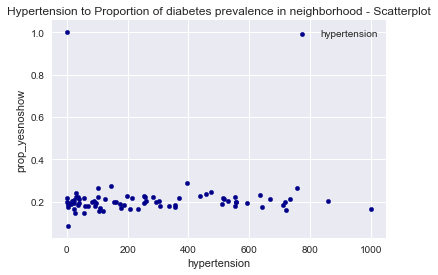

In [371]:
# spread of neighborhoods by mean_age, propr_yesnoshow, gender_ratio
hypertens_absences = df_comb_clean.plot(kind='scatter', x='hypertension', y='prop_yesnoshow',color='DarkBlue', label='hypertension')
plt.title('Hypertension to Proportion of diabetes prevalence in neighborhood - Scatterplot');


### Apart from the outliers, there does not appear to be a higher incidence of absences/no-shows based on hypertension incidences. There is a higher cluster between hypertension values of 0 to 100, but since the descriptives indicated that prop_yesnoshow was not showing much variability beyond 0.2, we see that pattern emerging in the scatter plot too.

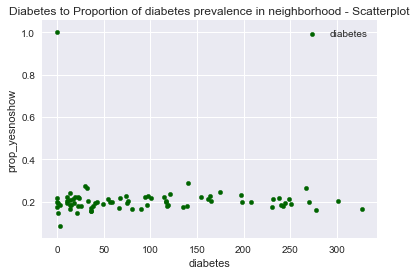

In [372]:
diabetes_absences = df_comb_clean.plot(kind='scatter', x='diabetes', y='prop_yesnoshow',
             color='DarkGreen', label='diabetes')
plt.title('Diabetes to Proportion of diabetes prevalence in neighborhood - Scatterplot');

### Same, with diabetes. Apart from the outliers, there does not appear to be a higher incidence of absences/no-shows based on diabetes incidences. There is a higher cluster between diabetes values of 0 to 100, but since the descriptives indicated that prop_yesnoshow was not showing much variability beyond 0.2, we see that pattern emerging in the scatter plot here as well.

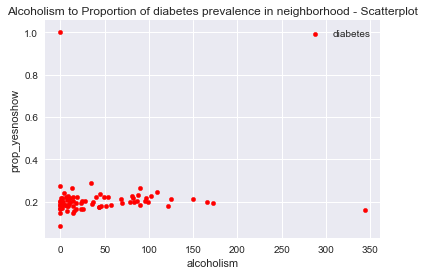

In [373]:
alcoholism_absences = df_comb_clean.plot(kind='scatter', x='alcoholism', y='prop_yesnoshow',
             color='Red', label='diabetes')
plt.title('Alcoholism to Proportion of diabetes prevalence in neighborhood - Scatterplot');

### With alcoholism, the data points are clustering towards the left, indicating a slight trend for lower alcoholism rates being linked to lower absences/no-shows. However since the rates of alcoholism are less as well, further statistical analysis needs to be done to see if what is the correlation between these two variables.


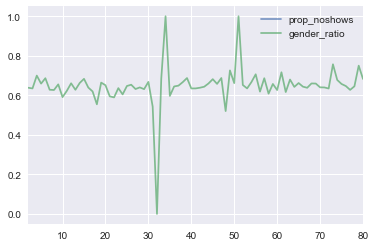

In [413]:
columns = df_comb_clean.loc[ : ,['prop_noshows','gender_ratio']]
columns.plot(kind='line',alpha=.7)

#df.loc[:,['A','B']]

#### Not sure why "prop_noshows" was not appearing on the graph!

### The following was not very helpful but also because I couldn't figure out how to distinguish the subplots by sms level. 

In [40]:
bins = [0.0, 10.75, 33.5, 79.5, 164.0] # Fill in this list with five values you just found
bin_names = ['low' ,'med','medhigh','high' ] # Name each level category
df_neighb_ns['hypert_level'] = pd.cut(df_neighb_ns['hypertension'],bins, labels = bin_names,include_lowest= True)


In [41]:
bins = [0.0, 4.0, 11.0, 29.0, 61.0] # Fill in this list with five values you just found
bin_names = ['low' ,'med','medhigh','high' ] # Name each level category
df_neighb_ns['diab_level'] = pd.cut(df_neighb_ns['diabetes'],bins, labels = bin_names,include_lowest= True)


In [42]:
bins = [0.0, 1.0, 5.0, 13.25, 42.0] # Fill in this list with five values you just found
bin_names = ['low' ,'med','medhigh','high' ] # Name each level category
df_neighb_ns['alcoh_level'] = pd.cut(df_neighb_ns['alcoholism'],bins, labels = bin_names,include_lowest= True)


In [43]:
bins = [0.0, 2.0, 10.5, 26.0] # Fill in this list with five values you just found
bin_names = ['low' ,'med','high' ] # Name each level category
df_neighb_ns['handicap_level'] = pd.cut(df_neighb_ns['handicap'],bins, labels = bin_names,include_lowest= True)


In [44]:
bins = [0.0, 32.75,77.0, 180.25, 641.0] # Fill in this list with five values you just found
bin_names = ['low' ,'med','medhigh','high' ] # Name each level category
df_neighb_ns['sms_level'] = pd.cut(df_neighb_ns['sms_received'],bins, labels = bin_names,include_lowest= True)


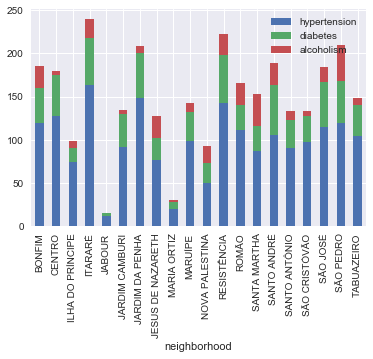

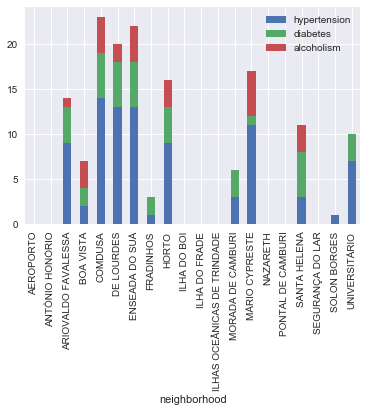

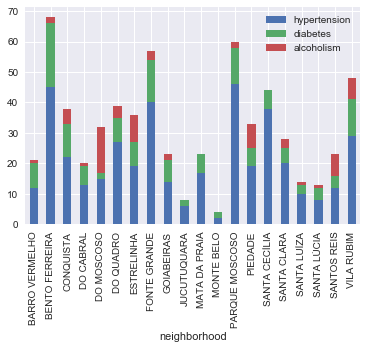

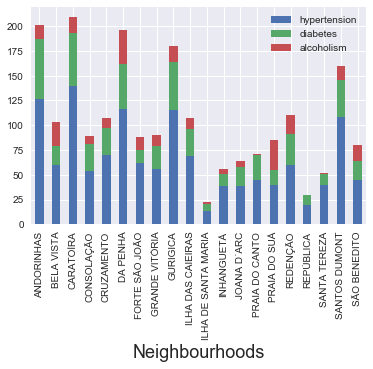

In [305]:
# Among no-shows, there are clusters of neighborhoods that have high rates of
# hypertension, diabetes and alcoholism
df_neighb_ns.groupby('sms_level')['hypertension', 'diabetes','alcoholism'].plot(kind='bar',stacked=True,sharex=True,legend=True)
plt.xlabel('Neighbourhoods', fontsize = 18)


###  These sub-plots were initial plots that led me to create a cum_sum across all 3 conditions and then sort the neighborhoods based on that sum, and I will be able to identify a possible correlation pattern between higher disease rates and no-shows. This was not needed as the scatterplots showed lower incidences of disease are not more or less likely to have no-shows.

<a id='conclusions'></a>
## Conclusions

### The review of this data indicated that my initial hypothesis that there was a relationship between neighborhoods and no-shows did not find initial support. I examined the ratio of no-shows to the diseases like hypertension, diabetes and alcoholism, and as the scatter plots suggest, there was no significant correlation apparent from the scatter plots.

### The descriptives also indicated that the no-show proportion for each neighborhood were fairly stable, with the average at .20, and the 75% percentile going up to 22%.  The final set of graphs were hinting at something of importance, but not very helpful in the end because I did not know how to identify the sub-plots by the categorical var-levels.

### Limitation of the data
### We were not provided much information about the source of this data, and how well it represents the population. The source of the data would also reveal if there was an inherent bias in the data, whether the data is self-reported or through a department of health and human services. The source of the data can affect the reliability of the data, e.g., the patients are likely to underreport alcoholism with a pre-existing condition. 


### Also, the sampling technique impacts the bias because self-selection, snowball sampling methods (rather than randomized controlled trials) are less likely to represent the true population, and have bias in built into these sampling methods. E.g., people with alcoholism or hypertension may not know/want to share their ailments, therefore those individuals are not sampled and we are only getting data from those who share data. That creates bias since we don't know more about the people who chose not to participate in the study or data collection.

### Future analysis
### My conclusion is that more statistical analysis needs to be done to examine the correlation and causation factors (if any) for no-shows. The preliminary analysis is limited in that way. Future work will examine correlations (Pearson correlations) and eventually regression models depending on what the correlations indicate regarding the relationship between neighborhoods no-show rates and incidences of various ailments. 
